# WeatherPy
## Observations & Trends:
* As anticipated, temperatures climb as we approach the equator
* All other factors (humididty, cloudiness, etc.) did not appear to be impacted by latitude
* Our data is only looking at one moment in time. Findings may be different if we looked at trends over time

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

### Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'There are {len(cities)} cities in my dataset')

There are 619 cities in my dataset


### Perform API Calls

In [3]:
# Creating dataframe to hold request data
data = pd.DataFrame({'City': cities})
data['Country'] = ''
data['Lat'] = ''
data['Lng'] = ''
data['Max Temp'] = ''
data['Humidity'] = ''
data['Cloudiness'] = ''
data['Wind Speed'] = ''
data['Date'] = ''

In [4]:
base_url = 'http://api.openweathermap.org/data/2.5/weather'
params = {'units': 'imperial',
          'appid': weather_api_key,
          'q': ''}

count = 0

for index, row in data.iterrows():
    params['q'] = row['City']
    url = (base_url, params)
    response = requests.get(base_url, params).json()

    if response['cod'] == 200:
        print(f'{count}. {row.City.capitalize()}: processed successfully')
        try:
            data.loc[index, 'Country'] = response['sys']['country']
            data.loc[index, 'Lat'] = response['coord']['lat']
            data.loc[index, 'Lng'] = response['coord']['lon']
            data.loc[index, 'Max Temp'] = response['main']['temp_max']
            data.loc[index, 'Humidity'] = response['main']['humidity']
            data.loc[index, 'Cloudiness'] = response['clouds']['all']
            data.loc[index, 'Wind Speed'] = response['wind']['speed']
            data.loc[index, 'Date'] = response['dt']
        except:
            pass
    else:
        print(f'{count}. {row.City.capitalize()}: not found')
        data = data.drop(count)
    count+= 1

0. Lardos: processed successfully
1. Road town: processed successfully
2. Provideniya: processed successfully
3. Manggar: processed successfully
4. Sijunjung: processed successfully
5. Lebu: processed successfully
6. Muli: processed successfully
7. San cristobal: processed successfully
8. Fairbanks: processed successfully
9. Fayaoue: processed successfully
10. Attawapiskat: not found
11. Vila franca do campo: processed successfully
12. Georgetown: processed successfully
13. Rikitea: processed successfully
14. Punta arenas: processed successfully
15. Albany: processed successfully
16. Progreso: processed successfully
17. Batken: processed successfully
18. Butaritari: processed successfully
19. Saint-philippe: processed successfully
20. Puerto ayora: processed successfully
21. Torbay: processed successfully
22. Krasnoselkup: processed successfully
23. Vaini: processed successfully
24. Castro: processed successfully
25. Ushuaia: processed successfully
26. Edd: processed successfully
27. Z

222. Kralendijk: processed successfully
223. Faanui: processed successfully
224. Bambous virieux: processed successfully
225. Llanes: processed successfully
226. Olafsvik: processed successfully
227. Castelo do piaui: processed successfully
228. Togur: processed successfully
229. Naze: processed successfully
230. Linxia: processed successfully
231. Nizhneyansk: not found
232. Victoria: processed successfully
233. Saskylakh: processed successfully
234. Southbridge: processed successfully
235. Beidao: processed successfully
236. Lerwick: processed successfully
237. Soskovo: processed successfully
238. Conde: processed successfully
239. Kamenskoye: not found
240. Hermanus: processed successfully
241. Port hardy: processed successfully
242. Divnomorskoye: processed successfully
243. Alta: processed successfully
244. Atar: processed successfully
245. Abaza: processed successfully
246. Sur: processed successfully
247. Kilimatinde: processed successfully
248. Grand-lahou: processed successful

443. Yirol: not found
444. Katsuura: processed successfully
445. San jose: processed successfully
446. Camana: processed successfully
447. Sipe sipe: processed successfully
448. Balykshi: not found
449. Hasaki: processed successfully
450. Novyy urgal: processed successfully
451. Bonito: processed successfully
452. Mayumba: processed successfully
453. Altamont: processed successfully
454. Liverpool: processed successfully
455. Rio grande: processed successfully
456. Lolua: not found
457. Marawi: processed successfully
458. Kotka: processed successfully
459. Seoul: processed successfully
460. Elizabeth city: processed successfully
461. Aberdare: processed successfully
462. Carnarvon: processed successfully
463. Oum hadjer: processed successfully
464. Saint-michel-des-saints: processed successfully
465. Itaporanga: processed successfully
466. Yeppoon: processed successfully
467. Dalnerechensk: processed successfully
468. Tuatapere: processed successfully
469. Nizwa: processed successfully

### Save & Display DataFrame

In [5]:
data = data.reset_index(drop=True)

In [6]:
print(f'{len(data.City)} cities were found and added to the new dataframe.')
data.head(1)

568 cities were found and added to the new dataframe.


,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,lardos,GR,36.09,28.02,87.8,52,0,18.34,1595434134


In [7]:
data.to_csv('../output_data/WeatherPy_Data.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.

In [8]:
# Loading from csv because it converts all my datatypes
data = pd.read_csv('../output_data/WeatherPy_Data.csv')

In [9]:
# No cities with humidity > 100
humidity = data.loc[data['Humidity'] <= 100]
print(f'{len(humidity.City)} cities remain (no cities with humidity > 100% were found).')

568 cities remain (no cities with humidity > 100% were found).


## Plotting the Data

In [10]:
# Create scatterplot function
def scatter(y_axis, y_label):
    plt.scatter(data['Lat'], y_axis, alpha=.7, edgecolors='black')
    plt.title(f'{y_label} vs. City Latitude (07/19/2020)')
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()
    plt.savefig(f'../output_data/Latitude_{y_axis.name}.png')
    plt.show()

## Latitude vs. Temperature Plot

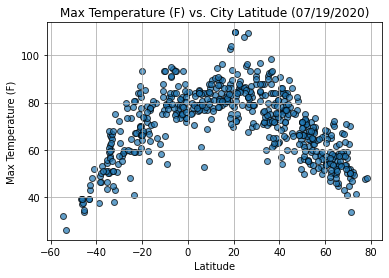

In [11]:
scatter(data['Max Temp'], 'Max Temperature (F)')

## Latitude vs. Humidity Plot

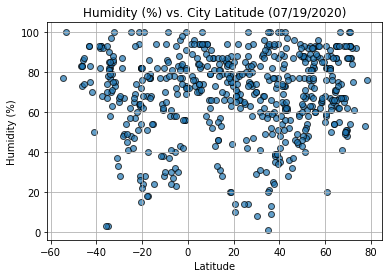

In [12]:
scatter(data['Humidity'], 'Humidity (%)')

## Latitude vs. Cloudiness Plot

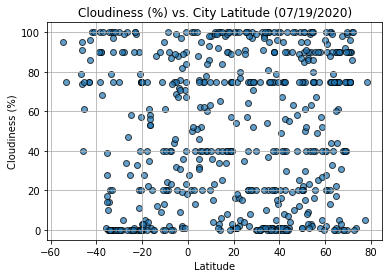

In [13]:
scatter(data['Cloudiness'], 'Cloudiness (%)')

## Latitude vs. Wind Speed Plot

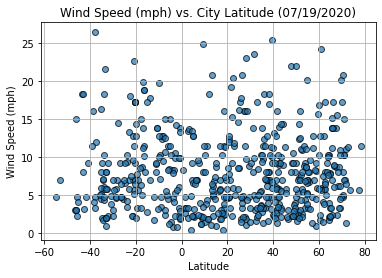

In [14]:
scatter(data['Wind Speed'], 'Wind Speed (mph)')

## Linear Regression

In [15]:
# Create northern and southern Hemisphere DataFrames
northern = data.loc[data['Lat'] > 0]
southern = data.loc[data['Lat'] < 0]

# Confirming new dataframes
print(f'''Northern hemisphere contains: {len(northern)} cities
Southern hemisphere contains: {len(southern)} cities
Total cities: {len(northern) + len(southern)} (matching original dataset total)''')

Northern hemisphere contains: 390 cities
Southern hemisphere contains: 178 cities
Total cities: 568 (matching original dataset total)


In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression(x_axis, y_axis, hemisphere):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_axis, y_axis)
    r_squared = rvalue**2
    regress_line = x_axis * slope + intercept
    plt.plot(x_axis, regress_line,
         'r--', label=f'y = {round(slope, 2)}x + {round(intercept, 2)}\nr-squared = {round(r_squared, 2)}')
    plt.scatter(x_axis, y_axis, alpha=.7, edgecolors='black')
    plt.title(f'{y_axis.name} vs. Latitude')
    plt.xlabel('Latitude')
    plt.ylabel(y_axis.name)
    plt.legend(loc='best')
    plt.savefig(f'../output_data/{hemisphere}_{x_axis.name}_{y_axis.name}.png')
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

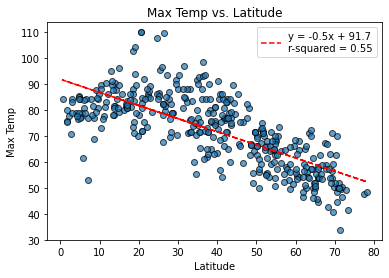

In [17]:
regression(northern['Lat'], northern['Max Temp'], 'N')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

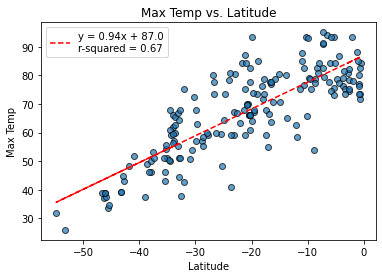

In [18]:
regression(southern['Lat'], southern['Max Temp'], 'S')

### Temperature vs Latitude Findings
* As expected, there appears to be a negative correlation between temperature and latitude in the northern hemisphere, while the converse is true in the southern hemisphere.
* The r-squared value for both plots are only approx 50% indicating that there are several data points far from the regression line, but the regression line appears to show a stronger correlation than the r-squared value might indicate alone. (Yes, I realize I need more statistical training!)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

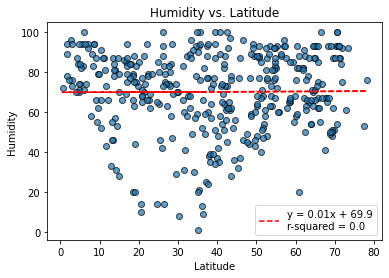

In [19]:
regression(northern['Lat'], northern['Humidity'], 'N')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

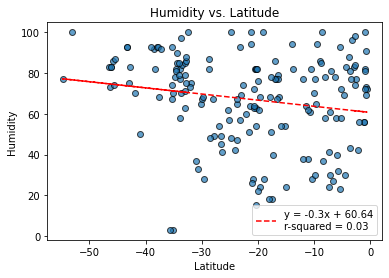

In [20]:
regression(southern['Lat'], southern['Humidity'], 'S')

### Humidty vs Latitude Findings
* There doesn't appear to be much of a correlation between humidity and latitude, none in the northern hemisphere. Slight negative correlation visualized on the southern hemisphere's regression line, but the r-squared value suggests very little correlation as many of the data points are far from the line.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

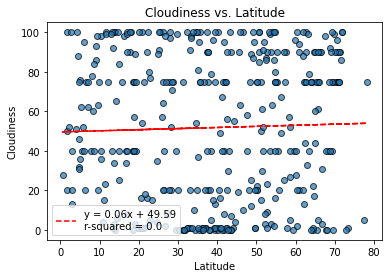

In [21]:
regression(northern['Lat'], northern['Cloudiness'], 'N')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

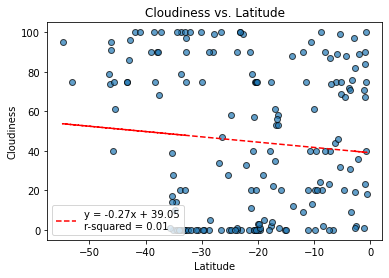

In [22]:
regression(southern['Lat'], southern['Cloudiness'], 'S')

### Cloud Cover vs Latitude Findings
* Again, there doesn't appear to be a significant correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

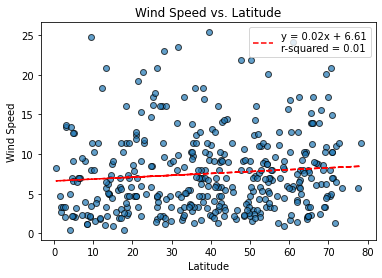

In [23]:
regression(northern['Lat'], northern['Wind Speed'], 'N')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

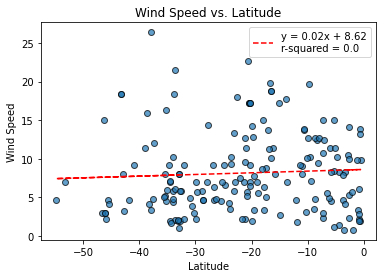

In [24]:
regression(southern['Lat'], southern['Wind Speed'], 'S')

### Wind Speed vs Latitude Findings
* There also appears to be no significant correlation between wind speed and latitude.